# The Normal Distribution

### What is a normal distribution ?
- A normal distribution is a distribution of data where the **mean = median = mode**
- 

<img src="pics/normal_distribution.png" width=800 height=200 />


### 68 - 95 - 99.7 Rule 
- For a normal distribution 
    - **68%** of the data is within **1 standard deviation from the mean**
    - **95%** of the data is within **2 standard deviation from the mean**
    - **99.7%** of the data is within **3 standard deviation from the mean**
    
 
- One application of this in trading could be that if we see that the price of a certain stock is extreme( low or high ), this maybe an indicator for buying or selling.

In [1]:
# importing relevant libraries as well as some settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#### Creating artificial data 
- Lets create a dataset -
- We are creating a dataset for the  weight of people  
    - mean (mu) of **60**
    - standard deviation (sigma) of **10**

In [2]:
mu, sigma = 60,10
s = np.random.normal(mu, sigma, 5000)

In [3]:
s

array([57.32807342, 60.99509172, 61.06928395, ..., 39.89085367,
       43.70122101, 57.71061802])

Text(0, 0.5, 'Frequency')

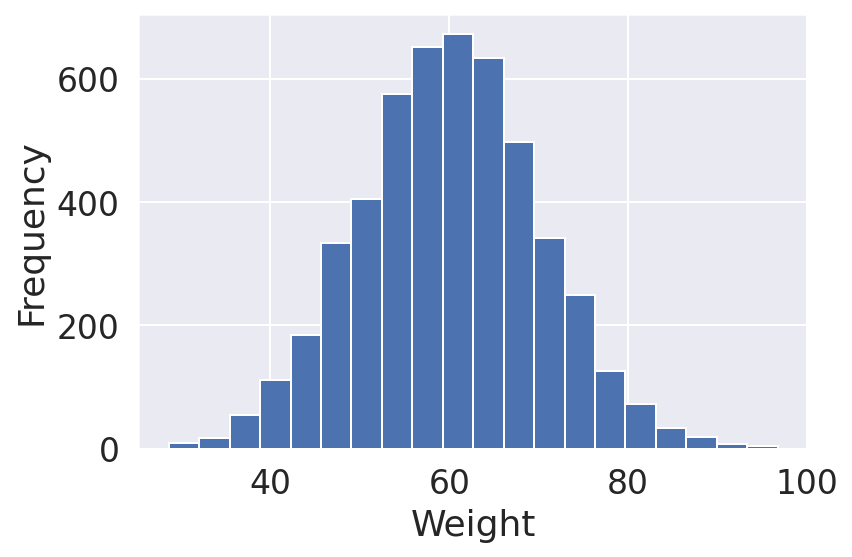

In [4]:
# this is an example of how the normal distribution will look like
plt.hist(s, bins = 20)
plt.xlabel('Weight')
plt.ylabel('Frequency')


### Standardizing the data
- Here we are standardizing the weight data and plotting the standardized data


In [5]:
# Standardization
std_data = (s-mu)/ sigma

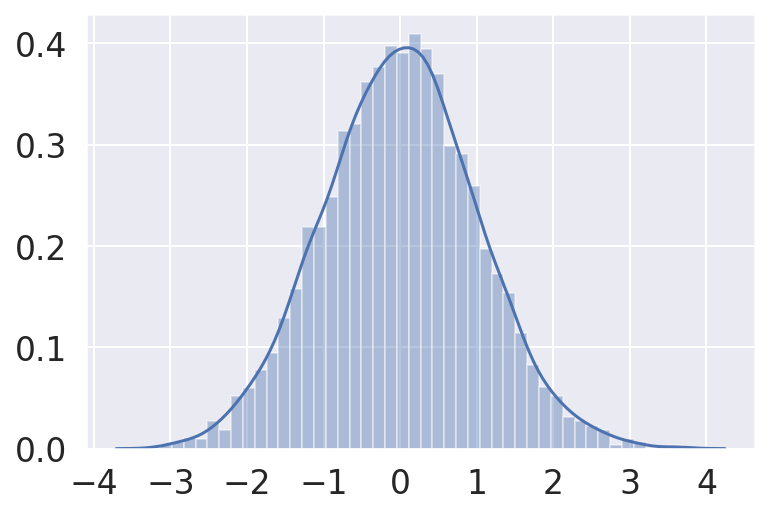

In [6]:
# plotting data 
# here the x-axis is the stanadard deviation while the y-axis is the percentage of the data 
sns.distplot(std_data, hist=True, label = True)
plt.xticks([-4,-3,-2,-1,0, 1, 2, 3,4])


plt.show()

### Central limit Theorem 
- The central limit theorem states: 
    - if many random samples are taken from a distribution, the means of the random samples will make a **normal distribution.**
- If we know that the data is normally distributed, we can make assumptions and analysis of the distribution as if iti is a normal distribution. 

#### Some Requirements :
- The more samples that is used, the closer it will resemble a normal distribution
- The closer the original population is to a normal distribution, the fewer sample is required.
- Some say that the minimum sample size should be at least 30.

#### For this example, we will look at basket ball data obtained from [Kaggle](https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues) 

In [7]:
bb = pd.read_csv('./data/bb_stats.csv')

In [8]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53798 entries, 0 to 53797
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       53798 non-null  object 
 1   Season       53798 non-null  object 
 2   Stage        53798 non-null  object 
 3   Player       53798 non-null  object 
 4   Team         53787 non-null  object 
 5   GP           53798 non-null  int64  
 6   MIN          53798 non-null  float64
 7   FGM          53798 non-null  int64  
 8   FGA          53798 non-null  int64  
 9   3PM          53798 non-null  int64  
 10  3PA          53798 non-null  int64  
 11  FTM          53798 non-null  int64  
 12  FTA          53798 non-null  int64  
 13  TOV          53798 non-null  int64  
 14  PF           53798 non-null  int64  
 15  ORB          53798 non-null  int64  
 16  DRB          53798 non-null  int64  
 17  REB          53798 non-null  int64  
 18  AST          53798 non-null  int64  
 19  STL 

In [9]:
bb.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2019 - 2020,Regular_Season,James Harden,HOU,68,2482.6,672,1514,299,...,2335,1989.0,Aug,"Aug 26, 1989",06-May,196.0,220.0,100.0,United States,Artesia High School
1,NBA,2019 - 2020,Regular_Season,Damian Lillard,POR,66,2473.7,624,1349,270,...,1978,1990.0,Jul,"Jul 15, 1990",06-Mar,191.0,195.0,88.0,United States,Oakland High School
2,NBA,2019 - 2020,Regular_Season,Devin Booker,PHX,70,2511.8,627,1283,141,...,1863,1996.0,Oct,"Oct 30, 1996",06-Jun,198.0,206.0,93.0,United States,Moss Point High School
3,NBA,2019 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,89,...,1857,1994.0,Dec,"Dec 6, 1994",06-Nov,211.0,242.0,110.0,Greece / Nigeria,NaN
4,NBA,2019 - 2020,Regular_Season,Trae Young,ATL,60,2120.1,546,1249,205,...,1778,1998.0,Sep,"Sep 19, 1998",06-Feb,188.0,180.0,82.0,United States,Norman High School


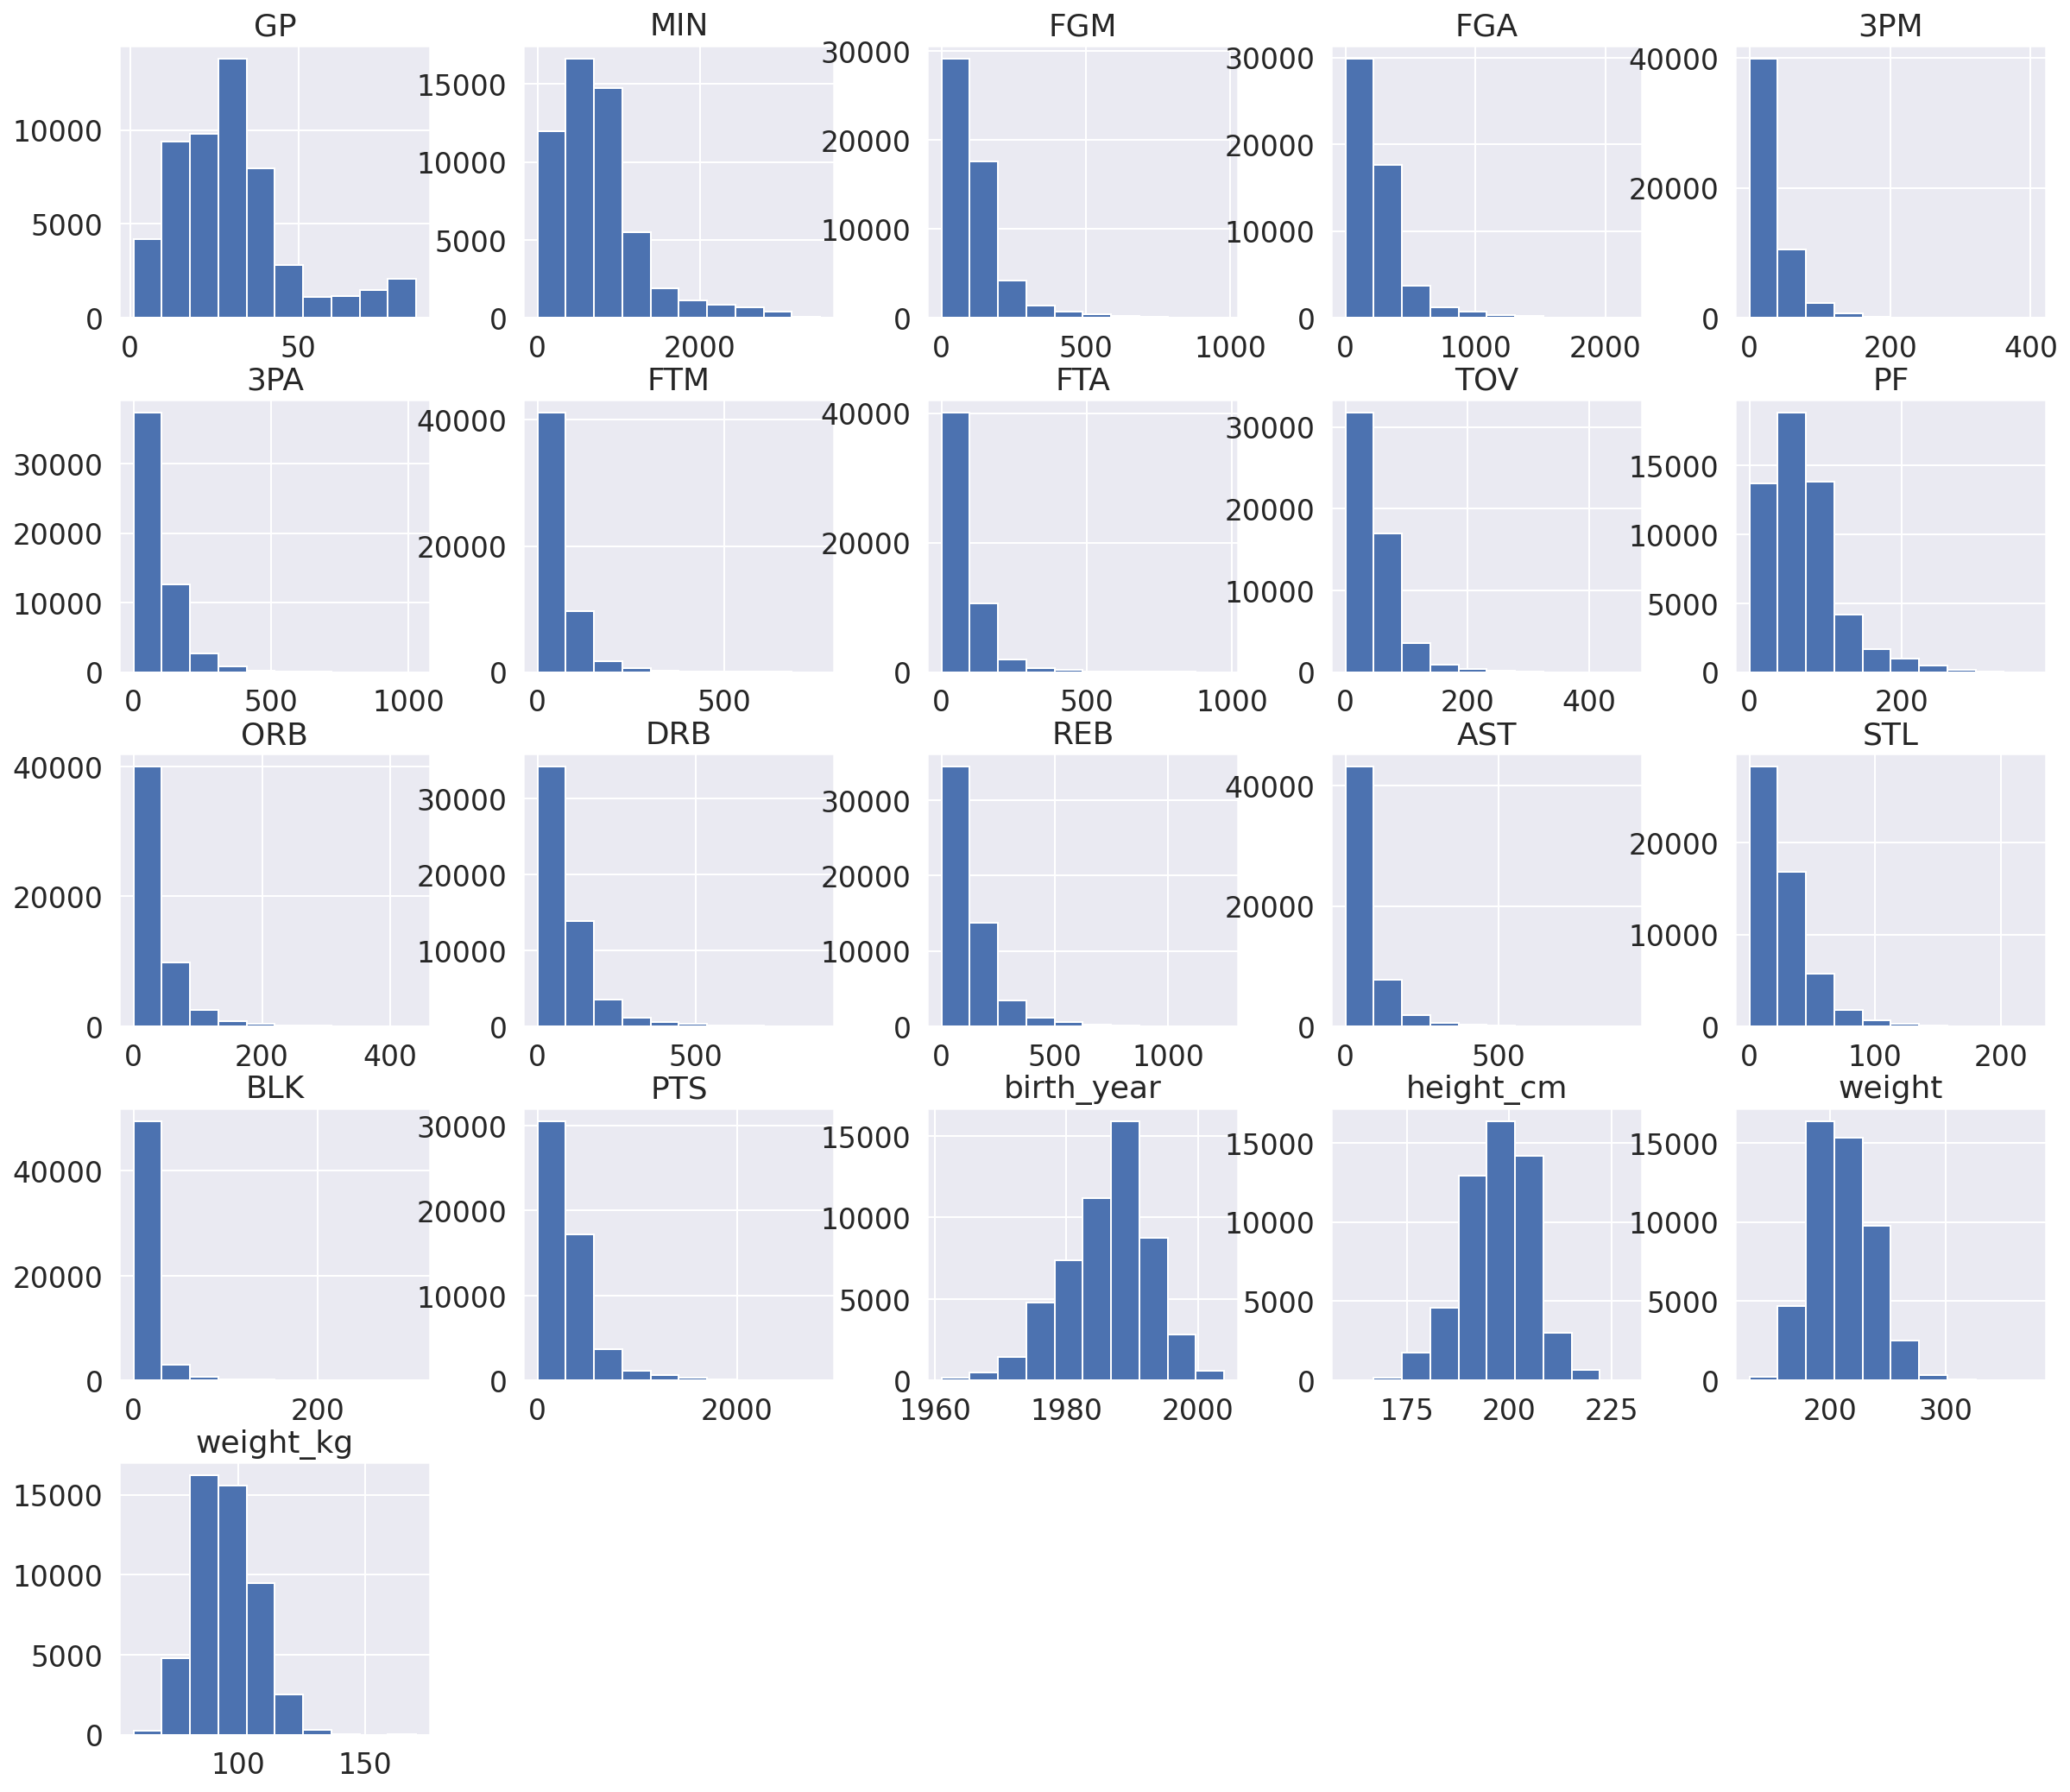

In [10]:
bb.hist(figsize=(20,18));

- Below is a function to gather the **mean** of the samples from the population data 
- There are 3 inputs 
    - data = population data 
    - n = size of sample that we are taking
    - k = number of samples that we are taking
    

In [14]:
def sampling (data, num, k) :
    sampling_means = []
    for i in range(k) :
        sample = np.random.choice(data, size =num, replace=True)
        sampling_means.append(np.mean(sample))
    return sampling_means

### Testing the Central Limit Theorem
- First we will plot the data.
- As we can see, this data is positively skewed and is not following a traditional normal distribution.

Text(0, 0.5, 'Frequency')

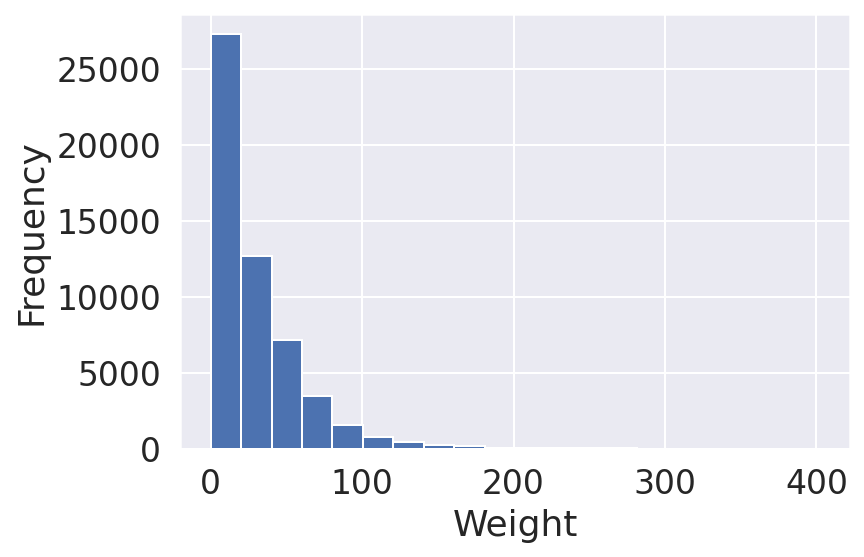

In [15]:
plt.hist(bb['3PM'], bins = 20)
plt.xlabel('Weight')
plt.ylabel('Frequency')

- Using the function that we created above we will collect samples from the `3PM` column and from there and obtain the mean of the data. 
- If we follow the central limit theorem,  we will get a normal distribution

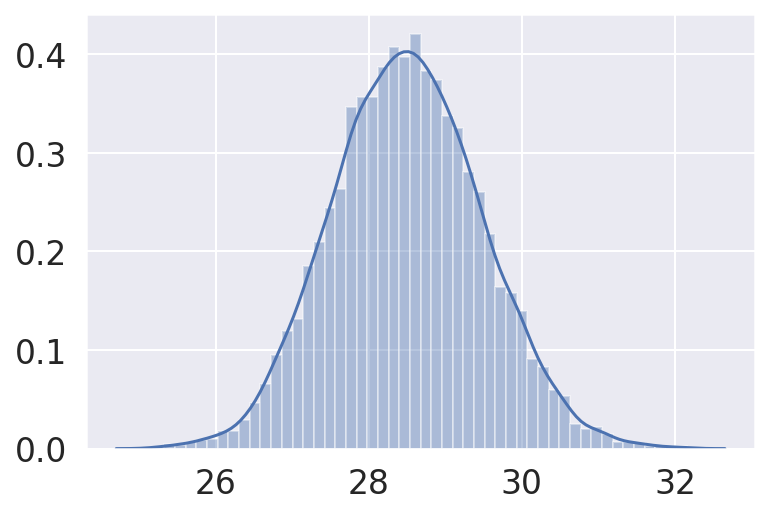

In [16]:
sns.distplot(sampling(bb['3PM'],1000,10000) )

### Exercise 1 
- Apply the central limit theorem to data of 3 other columns form the basketball dataset. Find:
    - What is the smallest value of k & n that is needed to make a good normal distribution n?
    - What will happen if the value of k & n is very big?

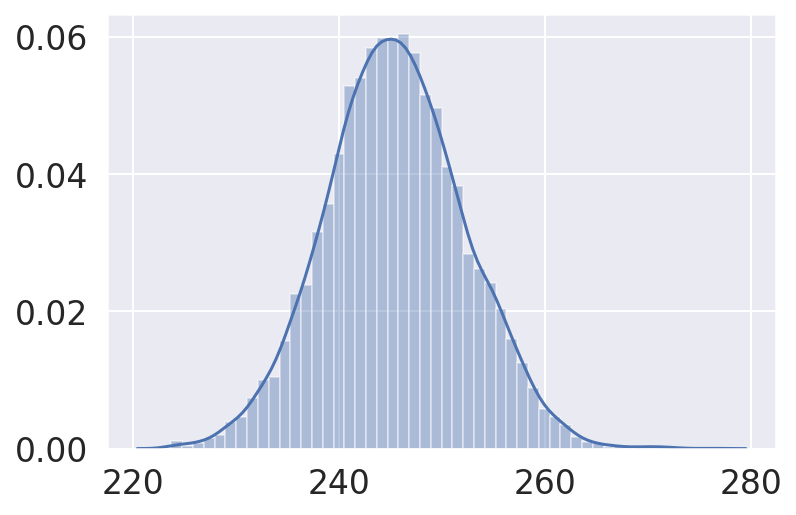

In [37]:
# FGA

sns.distplot(sampling(bb['FGA'],1000,10000) )

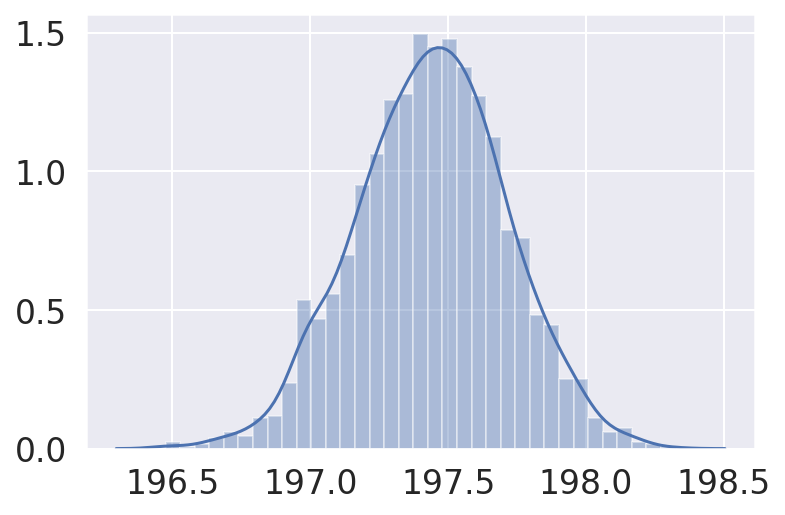

In [38]:
#height

sns.distplot(sampling(bb['height_cm'],1000,10000) )

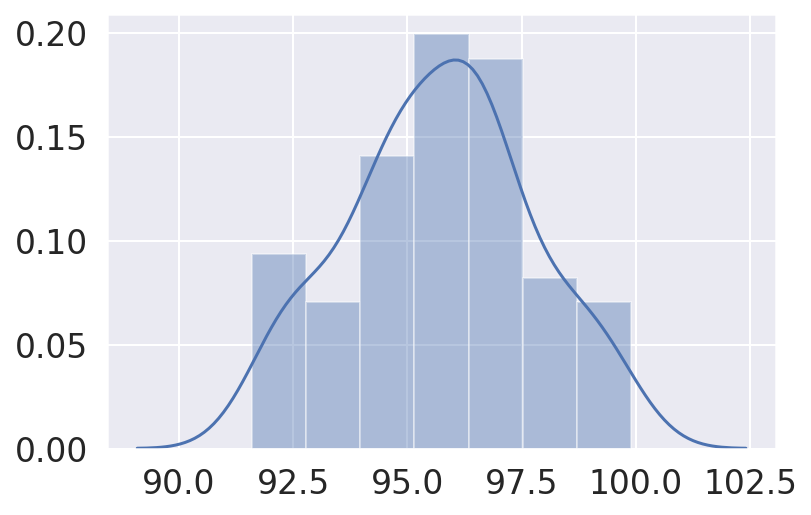

In [34]:
# weight kg

sns.distplot(sampling(bb['weight_kg'],30,1000) )

# Bonus 
- Why is the normal distribution important ?
- Why is the central limit theorem important

### Application :

#### Normal Distribution 

- [Investopedia - Normal Distribution](https://www.investopedia.com/terms/n/normaldistribution.asp)

#### Central Limit Theorem
- [Investopedia - CLT]( https://www.investopedia.com/terms/c/central_limit_theorem.asp#:~:text=According%20to%20the%20central%20limit,distribution%20is%20normal%20or%20aberrant.)
- [Tasty Trade - Application of CLT on Trading](https://www.tastytrade.com/tt/shows/from-theory-to-practice/episodes/the-central-limit-theorem-09-30-2016)

### References: 

- [Why Normal Distribution is Important](https://medium.com/fintechexplained/ever-wondered-why-normal-distribution-is-so-important-110a482abee3)
- [w3 random normal](https://www.w3schools.com/python/numpy_random_normal.asp)
- [Central Limit Theorem Definition](https://stattrek.com/statistics/dictionary.aspx?definition=central_limit_theorem#:~:text=The%20central%20limit%20theorem%20states,Requirements%20for%20accuracy.)
### Good Video References
- [StatQuest: The Normal Distribution (video)](https://www.youtube.com/watch?v=rzFX5NWojp0&ab_channel=StatQuestwithJoshStarmer)
- [The Normal Distribution and the 68-95-99.7 Rule (5.2)](https://youtu.be/mtbJbDwqWLE)
- [The Central Limit Theorem (video)](https://www.youtube.com/watch?v=YAlJCEDH2uY&ab_channel=StatQuestwithJoshStarmer)